# **문제1번**

In [32]:
import torch
from torch import nn
from torch.utils.data import DataLoader, ConcatDataset, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor

# 하이퍼파라미터
lr = 0.001
epochs = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 1. 전체 데이터셋 불러오기 및 합치기
train_data_raw = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data_raw = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())
full_dataset = ConcatDataset([train_data_raw, test_data_raw])  # 전체 70,000개

# 2. 8:1:1로 나누기
total_size = len(full_dataset)  # 70,000
train_size = int(0.8 * total_size)     # 56,000
val_size = int(0.1 * total_size)       # 7,000
test_size = total_size - train_size - val_size  # 7,000
train_data, val_data, test_data = random_split(full_dataset, [train_size, val_size, test_size])

# 3. DataLoader 설정 (minibatch 사용 안함 → batch_size = 전체)
train_loader = DataLoader(train_data, batch_size=len(train_data))
val_loader = DataLoader(val_data, batch_size=len(val_data))
test_loader = DataLoader(test_data, batch_size=len(test_data))

# 4. MLP 모델 정의 (2 hidden layer)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)

model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# 5. 학습 루프
for epoch in range(epochs):
    model.train()
    for X_train, y_train in train_loader:
        X_train, y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

# 모든 에폭 끝난 후, train/validation/test 성능 평가
model.eval()
with torch.no_grad():
    # Train Accuracy 측정
    for X_train, y_train in train_loader:
        X_train, y_train = X_train.to(device), y_train.to(device)
        pred_train = model(X_train)
        train_loss = criterion(pred_train, y_train).item()
        train_acc = (pred_train.argmax(1) == y_train).float().mean().item()

    # Validation Accuracy 측정
    for X_val, y_val in val_loader:
        X_val, y_val = X_val.to(device), y_val.to(device)
        pred_val = model(X_val)
        val_loss = criterion(pred_val, y_val).item()
        val_acc = (pred_val.argmax(1) == y_val).float().mean().item()

    # Test Accuracy 측정
    for X_test, y_test in test_loader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        pred_test = model(X_test)
        test_loss = criterion(pred_test, y_test).item()
        test_acc = (pred_test.argmax(1) == y_test).float().mean().item()

# 최종 출력
print("\n== 최종 결과 ==")
print(f"Train Accuracy:     {train_acc*100:.2f}% | Loss: {train_loss:.4f}")
print(f"Validation Accuracy:{val_acc*100:.2f}% | Loss: {val_loss:.4f}")
print(f"Test Accuracy:      {test_acc*100:.2f}% | Loss: {test_loss:.4f}")



== 최종 결과 ==
Train Accuracy:     10.17% | Loss: 2.3028
Validation Accuracy:10.43% | Loss: 2.3024
Test Accuracy:      10.16% | Loss: 2.3030


# 문제 **2번**


== 최종 결과 ==
Train Accuracy:     70.20% | Loss: 0.8329
Validation Accuracy:71.10% | Loss: 0.9943
Test Accuracy:      69.46% | Loss: 0.8062


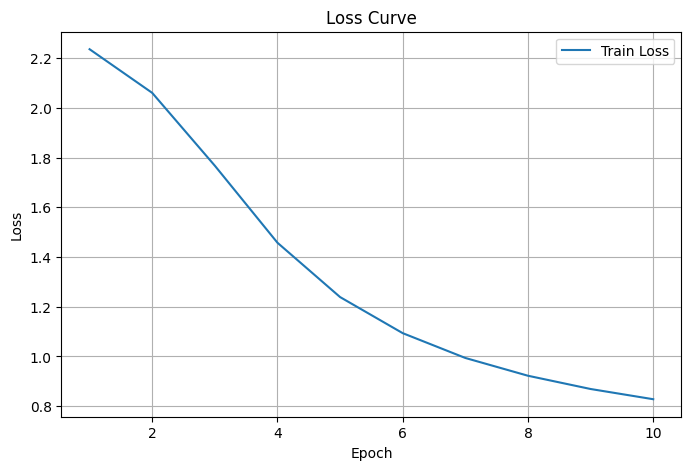

In [15]:
import torch
from torch import nn
from torch.utils.data import DataLoader, ConcatDataset, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor

# 하이퍼파라미터
lr = 0.001
epochs = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 1. 전체 데이터셋 불러오기 및 합치기
train_data_raw = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data_raw = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())
full_dataset = ConcatDataset([train_data_raw, test_data_raw])  # 전체 70,000개

# 2. 8:1:1로 나누기
total_size = len(full_dataset)  # 70,000
train_size = int(0.8 * total_size)     # 56,000
val_size = int(0.1 * total_size)       # 7,000
test_size = total_size - train_size - val_size  # 7,000
train_data, val_data, test_data = random_split(full_dataset, [train_size, val_size, test_size])

# 3. DataLoader 설정 (minibatch 사용 → batch_size = 64)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

# 4. MLP 모델 정의 (2 hidden layer)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)

model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)


#학습하기전 에폭별 loss를 기록하기 위해 빈 리스트 하나 생성
train_losses = []

# 5. 학습 루프
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_train, y_train in train_loader:
        X_train, y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * X_train.size(0)  # 전체 loss 누적 (평균 계산용)
    avg_train_loss = epoch_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

# 모든 에폭 끝난 후, train/validation/test 성능 평가
model.eval()
with torch.no_grad():
    # Train Accuracy 측정
    correct_train, total_train = 0, 0
    for X_train, y_train in train_loader:  # 미니 배치 처리
        X_train, y_train = X_train.to(device), y_train.to(device)
        pred_train = model(X_train)
        _, predicted = torch.max(pred_train, 1)
        total_train += y_train.size(0)
        correct_train += (predicted == y_train).sum().item()
    train_acc = correct_train / total_train
    train_loss = criterion(pred_train, y_train).item()

    # Validation Accuracy 측정
    correct_val, total_val = 0, 0
    for X_val, y_val in val_loader:  # 미니 배치 처리
        X_val, y_val = X_val.to(device), y_val.to(device)
        pred_val = model(X_val)
        _, predicted = torch.max(pred_val, 1)
        total_val += y_val.size(0)
        correct_val += (predicted == y_val).sum().item()
    val_acc = correct_val / total_val
    val_loss = criterion(pred_val, y_val).item()

    # Test Accuracy 측정
    correct_test, total_test = 0, 0
    for X_test, y_test in test_loader:  # 미니 배치 처리
        X_test, y_test = X_test.to(device), y_test.to(device)
        pred_test = model(X_test)
        _, predicted = torch.max(pred_test, 1)
        total_test += y_test.size(0)
        correct_test += (predicted == y_test).sum().item()
    test_acc = correct_test / total_test
    test_loss = criterion(pred_test, y_test).item()

# 최종 출력
print("\n== 최종 결과 ==")
print(f"Train Accuracy:     {train_acc*100:.2f}% | Loss: {train_loss:.4f}")
print(f"Validation Accuracy:{val_acc*100:.2f}% | Loss: {val_loss:.4f}")
print(f"Test Accuracy:      {test_acc*100:.2f}% | Loss: {test_loss:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.show()





# **문제 3번 - 정규화**

Epoch 1/10 | Train Loss: 2.0540, Train Acc: 47.58% | Test Loss: 1.7508, Test Acc: 55.43%
Epoch 2/10 | Train Loss: 1.4385, Train Acc: 63.31% | Test Loss: 1.1943, Test Acc: 67.73%
Epoch 3/10 | Train Loss: 1.0481, Train Acc: 70.23% | Test Loss: 0.9459, Test Acc: 71.20%
Epoch 4/10 | Train Loss: 0.8700, Train Acc: 72.68% | Test Loss: 0.8234, Test Acc: 72.83%
Epoch 5/10 | Train Loss: 0.7751, Train Acc: 73.85% | Test Loss: 0.7531, Test Acc: 74.11%
Epoch 6/10 | Train Loss: 0.7171, Train Acc: 74.95% | Test Loss: 0.7076, Test Acc: 74.86%
Epoch 7/10 | Train Loss: 0.6777, Train Acc: 75.93% | Test Loss: 0.6752, Test Acc: 75.99%
Epoch 8/10 | Train Loss: 0.6483, Train Acc: 76.68% | Test Loss: 0.6496, Test Acc: 76.34%
Epoch 9/10 | Train Loss: 0.6249, Train Acc: 77.49% | Test Loss: 0.6312, Test Acc: 77.56%
Epoch 10/10 | Train Loss: 0.6051, Train Acc: 78.17% | Test Loss: 0.6131, Test Acc: 78.09%


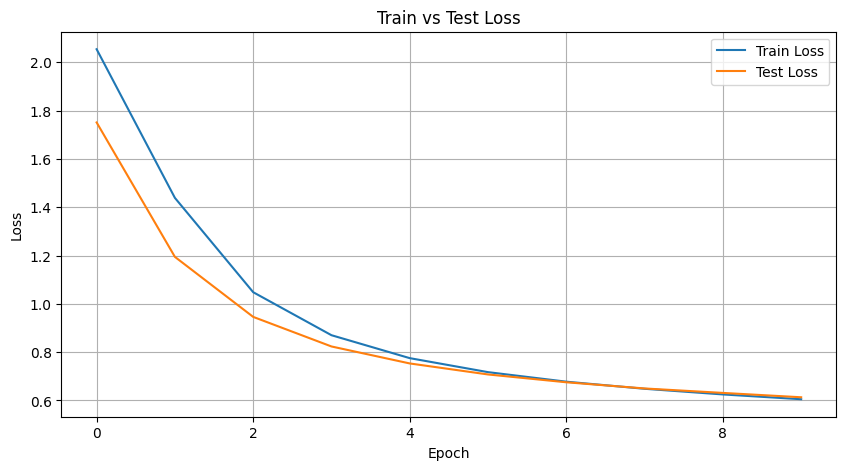

In [29]:
import torch
from torch import nn
from torch.utils.data import DataLoader, ConcatDataset, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

# 하이퍼파라미터
lr = 0.001
epochs = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 1-1. 데이터 nomalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 평균 0.5, 표준편차 0.5 → [-1, 1] 범위로 정규화
])

# 1. 전체 데이터셋 불러오기 및 합치기
train_data_raw = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform)
test_data_raw = datasets.FashionMNIST(root="data", train=False, download=True, transform=transform)
full_dataset = ConcatDataset([train_data_raw, test_data_raw])  # 전체 70,000개



# 2. 8:1:1로 나누기
total_size = len(full_dataset)  # 70,000
train_size = int(0.8 * total_size)     # 56,000
val_size = int(0.1 * total_size)       # 7,000
test_size = total_size - train_size - val_size  # 7,000
train_data, val_data, test_data = random_split(full_dataset, [train_size, val_size, test_size])
# 3. DataLoader 설정 (minibatch 사용 → batch_size = 64)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

# 4. MLP 모델 정의 (2 hidden layer)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)

model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# 학습 전 에폭별 loss 저장용 리스트
train_losses = []
test_losses = []

# 학습 루프
for epoch in range(epochs):
    # ----- 학습 -----
    model.train()
    epoch_loss = 0
    correct, total = 0, 0

    for X_train, y_train in train_loader:
        X_train, y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * X_train.size(0)

        # 정확도 계산
        _, predicted = torch.max(output, 1)
        total += y_train.size(0)
        correct += (predicted == y_train).sum().item()

    avg_train_loss = epoch_loss / len(train_loader.dataset)
    train_acc = correct / total
    train_losses.append(avg_train_loss)

    # ----- 검증 -----
    model.eval()
    test_loss = 0
    correct, total = 0, 0

    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            output = model(X_test)
            loss = criterion(output, y_test)

            test_loss += loss.item() * X_test.size(0)

            # 정확도 계산
            _, predicted = torch.max(output, 1)
            total += y_test.size(0)
            correct += (predicted == y_test).sum().item()

    avg_test_loss = test_loss / len(test_loader.dataset)
    test_acc = correct / total
    test_losses.append(avg_test_loss)

    # ----- 출력 -----
    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc*100:.2f}% | "
          f"Test Loss: {avg_test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

# ----- loss 시각화 -----
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid(True)
plt.show()



# **문제4번 - Optimizer**

Training with SGD
Epoch 1 - Loss: 2.0678
Epoch 2 - Loss: 1.4850
Epoch 3 - Loss: 1.0826
Epoch 4 - Loss: 0.8868
Epoch 5 - Loss: 0.7832
Epoch 6 - Loss: 0.7219
Epoch 7 - Loss: 0.6816
Epoch 8 - Loss: 0.6521
Epoch 9 - Loss: 0.6289
Epoch 10 - Loss: 0.6095
Training with SGD+Momentum
Epoch 1 - Loss: 1.0033
Epoch 2 - Loss: 0.5494
Epoch 3 - Loss: 0.4834
Epoch 4 - Loss: 0.4501
Epoch 5 - Loss: 0.4281
Epoch 6 - Loss: 0.4095
Epoch 7 - Loss: 0.3946
Epoch 8 - Loss: 0.3837
Epoch 9 - Loss: 0.3705
Epoch 10 - Loss: 0.3617
Training with SGD+Nesterov
Epoch 1 - Loss: 0.9978
Epoch 2 - Loss: 0.5502
Epoch 3 - Loss: 0.4814
Epoch 4 - Loss: 0.4467
Epoch 5 - Loss: 0.4234
Epoch 6 - Loss: 0.4059
Epoch 7 - Loss: 0.3905
Epoch 8 - Loss: 0.3790
Epoch 9 - Loss: 0.3680
Epoch 10 - Loss: 0.3583
Training with AdaGrad
Epoch 1 - Loss: 0.5680
Epoch 2 - Loss: 0.4562
Epoch 3 - Loss: 0.4291
Epoch 4 - Loss: 0.4130
Epoch 5 - Loss: 0.4009
Epoch 6 - Loss: 0.3917
Epoch 7 - Loss: 0.3841
Epoch 8 - Loss: 0.3779
Epoch 9 - Loss: 0.3723
Epoch 

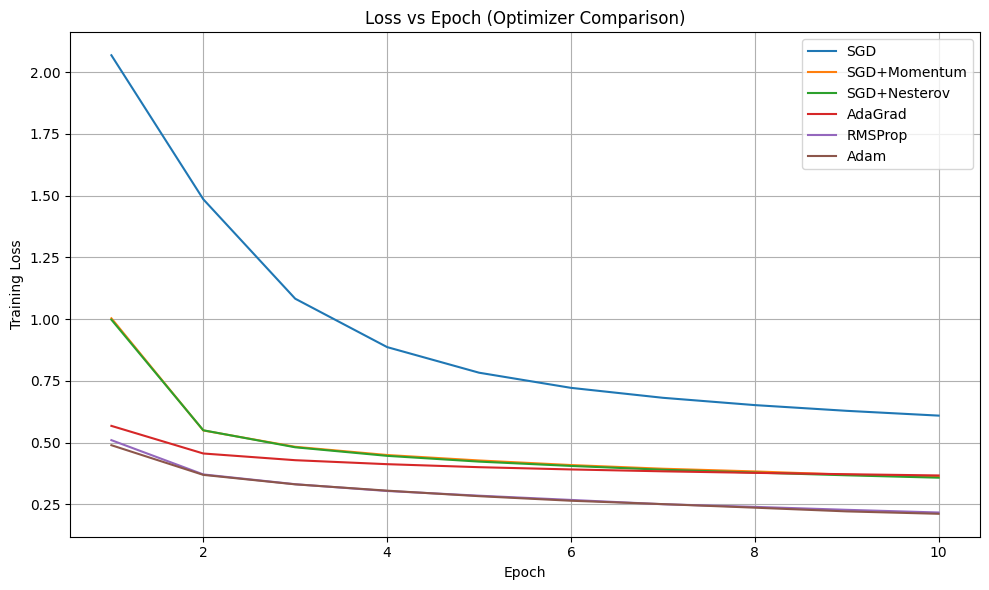

In [23]:
import torch
from torch import nn
from torch.utils.data import DataLoader, ConcatDataset, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
import matplotlib.pyplot as plt

# 하이퍼파라미터
lr = 0.001
epochs = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 1-1. 데이터 nomalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 평균 0.5, 표준편차 0.5 → [-1, 1] 범위로 정규화
])

# 1. 전체 데이터셋 불러오기 및 합치기
train_data_raw = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform)
test_data_raw = datasets.FashionMNIST(root="data", train=False, download=True, transform=transform)
full_dataset = ConcatDataset([train_data_raw, test_data_raw])  # 전체 70,000개

# 2. 8:1:1로 나누기
total_size = len(full_dataset)  # 70,000
train_size = int(0.8 * total_size)     # 56,000
val_size = int(0.1 * total_size)       # 7,000
test_size = total_size - train_size - val_size  # 7,000
train_data, val_data, test_data = random_split(full_dataset, [train_size, val_size, test_size])

# 3. DataLoader 설정 (minibatch 사용 → batch_size = 64)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

# 4. MLP 모델 정의 (2 hidden layer)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)

# 옵티마이저 리스트
optimizers_dict = {
    'SGD': lambda params: torch.optim.SGD(params, lr=lr),
    'SGD+Momentum': lambda params: torch.optim.SGD(params, lr=lr, momentum=0.9),
    'SGD+Nesterov': lambda params: torch.optim.SGD(params, lr=lr, momentum=0.9, nesterov=True),
    'AdaGrad': lambda params: torch.optim.Adagrad(params, lr=lr),
    'RMSProp': lambda params: torch.optim.RMSprop(params, lr=lr),
    'Adam': lambda params: torch.optim.Adam(params, lr=lr)
}

results = {}

# 옵티마이저 별로 순차적으로 학습
for name, opt_func in optimizers_dict.items():
    print(f"Training with {name}")
    model = MLP().to(device)
    optimizer = opt_func(model.parameters())
    criterion = nn.CrossEntropyLoss()
    train_losses = []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * X_batch.size(0)
        avg_loss = epoch_loss / len(train_loader.dataset)
        train_losses.append(avg_loss)
        print(f"Epoch {epoch+1} - Loss: {avg_loss:.4f}")

    results[name] = train_losses
    torch.cuda.empty_cache()  # GPU 메모리 비우기

# 그래프 그리기
plt.figure(figsize=(10, 6))
for name, losses in results.items():
    plt.plot(range(1, epochs + 1), losses, label=name)

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Loss vs Epoch (Optimizer Comparison)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **문제 5번 - Dropout**

Epoch 1/10 | Train Loss: 0.6214, Train Acc: 77.48% | Test Loss: 0.4664, Test Acc: 82.80%
Epoch 2/10 | Train Loss: 0.4945, Train Acc: 82.24% | Test Loss: 0.3951, Test Acc: 85.79%
Epoch 3/10 | Train Loss: 0.4621, Train Acc: 83.53% | Test Loss: 0.3784, Test Acc: 86.03%
Epoch 4/10 | Train Loss: 0.4447, Train Acc: 84.08% | Test Loss: 0.3709, Test Acc: 86.53%
Epoch 5/10 | Train Loss: 0.4291, Train Acc: 84.57% | Test Loss: 0.3765, Test Acc: 86.24%
Epoch 6/10 | Train Loss: 0.4175, Train Acc: 84.89% | Test Loss: 0.3696, Test Acc: 86.33%
Epoch 7/10 | Train Loss: 0.4119, Train Acc: 85.28% | Test Loss: 0.3504, Test Acc: 87.37%
Epoch 8/10 | Train Loss: 0.4049, Train Acc: 85.40% | Test Loss: 0.3519, Test Acc: 86.90%
Epoch 9/10 | Train Loss: 0.3921, Train Acc: 85.95% | Test Loss: 0.3369, Test Acc: 87.59%
Epoch 10/10 | Train Loss: 0.3863, Train Acc: 86.03% | Test Loss: 0.3394, Test Acc: 87.83%


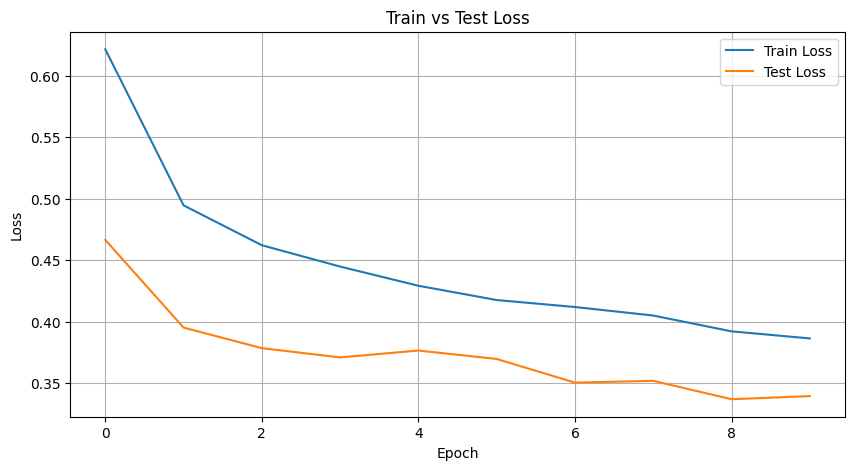

In [30]:
import torch
from torch import nn
from torch.utils.data import DataLoader, ConcatDataset, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

# 하이퍼파라미터
lr = 0.001
epochs = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 1-1. 데이터 nomalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 평균 0.5, 표준편차 0.5 → [-1, 1] 범위로 정규화
])

# 1. 전체 데이터셋 불러오기 및 합치기
train_data_raw = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform)
test_data_raw = datasets.FashionMNIST(root="data", train=False, download=True, transform=transform)
full_dataset = ConcatDataset([train_data_raw, test_data_raw])  # 전체 70,000개



# 2. 8:1:1로 나누기
total_size = len(full_dataset)  # 70,000
train_size = int(0.8 * total_size)     # 56,000
val_size = int(0.1 * total_size)       # 7,000
test_size = total_size - train_size - val_size  # 7,000
train_data, val_data, test_data = random_split(full_dataset, [train_size, val_size, test_size])
# 3. DataLoader 설정 (minibatch 사용 → batch_size = 64)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

# Dropout을 포함한 MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)

model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

#학습하기전 에폭별 loss를 기록하기 위해 빈 리스트 하나 생성

# 학습 전 에폭별 loss 저장용 리스트
train_losses = []
test_losses = []

# 학습 루프
for epoch in range(epochs):
    # ----- 학습 -----
    model.train()
    epoch_loss = 0
    correct, total = 0, 0

    for X_train, y_train in train_loader:
        X_train, y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * X_train.size(0)

        # 정확도 계산
        _, predicted = torch.max(output, 1)
        total += y_train.size(0)
        correct += (predicted == y_train).sum().item()

    avg_train_loss = epoch_loss / len(train_loader.dataset)
    train_acc = correct / total
    train_losses.append(avg_train_loss)

    # ----- 검증 -----
    model.eval()
    test_loss = 0
    correct, total = 0, 0

    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            output = model(X_test)
            loss = criterion(output, y_test)

            test_loss += loss.item() * X_test.size(0)

            # 정확도 계산
            _, predicted = torch.max(output, 1)
            total += y_test.size(0)
            correct += (predicted == y_test).sum().item()

    avg_test_loss = test_loss / len(test_loader.dataset)
    test_acc = correct / total
    test_losses.append(avg_test_loss)

    # ----- 출력 -----
    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc*100:.2f}% | "
          f"Test Loss: {avg_test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

# ----- loss 시각화 -----
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid(True)
plt.show()



# 문제 6번 - BatchNorm1d **적용**

Epoch 1/10 | Train Loss: 0.5579, Train Acc: 80.20% | Test Loss: 0.3957, Test Acc: 85.47%
Epoch 2/10 | Train Loss: 0.4358, Train Acc: 84.29% | Test Loss: 0.3546, Test Acc: 86.69%
Epoch 3/10 | Train Loss: 0.4047, Train Acc: 85.43% | Test Loss: 0.3445, Test Acc: 87.44%
Epoch 4/10 | Train Loss: 0.3867, Train Acc: 85.91% | Test Loss: 0.3327, Test Acc: 87.71%
Epoch 5/10 | Train Loss: 0.3663, Train Acc: 86.77% | Test Loss: 0.3446, Test Acc: 86.90%
Epoch 6/10 | Train Loss: 0.3529, Train Acc: 87.00% | Test Loss: 0.3231, Test Acc: 88.16%
Epoch 7/10 | Train Loss: 0.3441, Train Acc: 87.33% | Test Loss: 0.3161, Test Acc: 88.00%
Epoch 8/10 | Train Loss: 0.3332, Train Acc: 87.70% | Test Loss: 0.3080, Test Acc: 88.57%
Epoch 9/10 | Train Loss: 0.3193, Train Acc: 88.16% | Test Loss: 0.3110, Test Acc: 88.20%
Epoch 10/10 | Train Loss: 0.3179, Train Acc: 88.10% | Test Loss: 0.3017, Test Acc: 88.76%


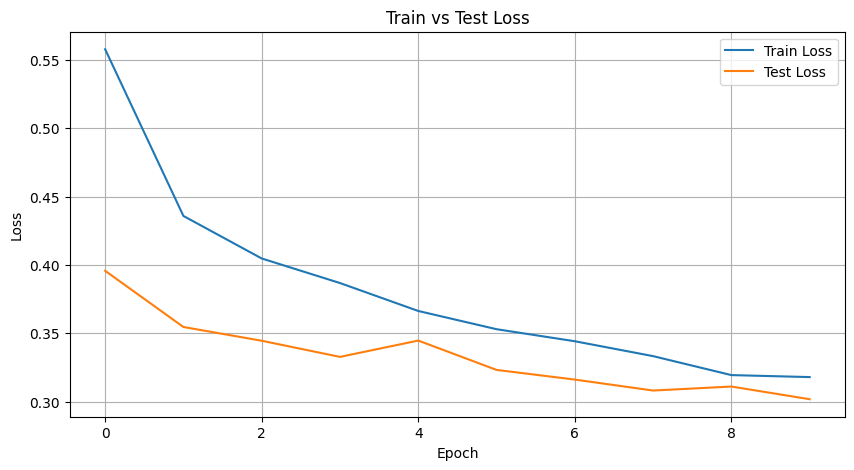

In [31]:
import torch
from torch import nn
from torch.utils.data import DataLoader, ConcatDataset, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

# 하이퍼파라미터
lr = 0.001
epochs = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 1-1. 데이터 nomalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 평균 0.5, 표준편차 0.5 → [-1, 1] 범위로 정규화
])

# 1. 전체 데이터셋 불러오기 및 합치기
train_data_raw = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform)
test_data_raw = datasets.FashionMNIST(root="data", train=False, download=True, transform=transform)
full_dataset = ConcatDataset([train_data_raw, test_data_raw])  # 전체 70,000개



# 2. 8:1:1로 나누기
total_size = len(full_dataset)  # 70,000
train_size = int(0.8 * total_size)     # 56,000
val_size = int(0.1 * total_size)       # 7,000
test_size = total_size - train_size - val_size  # 7,000
train_data, val_data, test_data = random_split(full_dataset, [train_size, val_size, test_size])
# 3. DataLoader 설정 (minibatch 사용 → batch_size = 64)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

# Dropout + BatchNorm 포함한 MLP 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.BatchNorm1d(512),  # BatchNorm 추가
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),  # BatchNorm 추가
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)

model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

#학습하기전 에폭별 loss를 기록하기 위해 빈 리스트 하나 생성

# 학습 전 에폭별 loss 저장용 리스트
train_losses = []
test_losses = []

# 학습 루프
for epoch in range(epochs):
    # ----- 학습 -----
    model.train()
    epoch_loss = 0
    correct, total = 0, 0

    for X_train, y_train in train_loader:
        X_train, y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * X_train.size(0)

        # 정확도 계산
        _, predicted = torch.max(output, 1)
        total += y_train.size(0)
        correct += (predicted == y_train).sum().item()

    avg_train_loss = epoch_loss / len(train_loader.dataset)
    train_acc = correct / total
    train_losses.append(avg_train_loss)

    # ----- 검증 -----
    model.eval()
    test_loss = 0
    correct, total = 0, 0

    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            output = model(X_test)
            loss = criterion(output, y_test)

            test_loss += loss.item() * X_test.size(0)

            # 정확도 계산
            _, predicted = torch.max(output, 1)
            total += y_test.size(0)
            correct += (predicted == y_test).sum().item()

    avg_test_loss = test_loss / len(test_loader.dataset)
    test_acc = correct / total
    test_losses.append(avg_test_loss)

    # ----- 출력 -----
    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc*100:.2f}% | "
          f"Test Loss: {avg_test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

# ----- loss 시각화 -----
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid(True)
plt.show()



# **문제7번 - hyperparameter 수정**

In [35]:
import torch
from torch import nn
from torch.utils.data import DataLoader, ConcatDataset, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

# 하이퍼파라미터
lr = 0.001
epochs = 20
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 1-1. 데이터 nomalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 평균 0.5, 표준편차 0.5 → [-1, 1] 범위로 정규화
])

# 1. 전체 데이터셋 불러오기 및 합치기
train_data_raw = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform)
test_data_raw = datasets.FashionMNIST(root="data", train=False, download=True, transform=transform)
full_dataset = ConcatDataset([train_data_raw, test_data_raw])  # 전체 70,000개



# 2. 8:1:1로 나누기
total_size = len(full_dataset)  # 70,000
train_size = int(0.8 * total_size)     # 56,000
val_size = int(0.1 * total_size)       # 7,000
test_size = total_size - train_size - val_size  # 7,000
train_data, val_data, test_data = random_split(full_dataset, [train_size, val_size, test_size])
# 3. DataLoader 설정 (minibatch 사용 → batch_size = 64)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

# Dropout + BatchNorm 포함한 MLP 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.BatchNorm1d(512),  # BatchNorm 추가
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),  # BatchNorm 추가
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)

model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

#학습하기전 에폭별 loss를 기록하기 위해 빈 리스트 하나 생성

# 학습 전 에폭별 loss 저장용 리스트
train_losses = []

# 학습 루프 (validation/test는 제외)
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct, total = 0, 0

    for X_train, y_train in train_loader:
        X_train, y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * X_train.size(0)
        _, predicted = torch.max(output, 1)
        total += y_train.size(0)
        correct += (predicted == y_train).sum().item()

    avg_train_loss = epoch_loss / len(train_loader.dataset)
    train_acc = correct / total
    train_losses.append(avg_train_loss)

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc*100:.2f}%")




Epoch 1/20 | Train Loss: 0.5555, Train Acc: 80.25%
Epoch 2/20 | Train Loss: 0.4360, Train Acc: 84.24%
Epoch 3/20 | Train Loss: 0.4038, Train Acc: 85.31%
Epoch 4/20 | Train Loss: 0.3820, Train Acc: 86.14%
Epoch 5/20 | Train Loss: 0.3668, Train Acc: 86.61%
Epoch 6/20 | Train Loss: 0.3520, Train Acc: 87.12%
Epoch 7/20 | Train Loss: 0.3427, Train Acc: 87.38%
Epoch 8/20 | Train Loss: 0.3326, Train Acc: 87.81%
Epoch 9/20 | Train Loss: 0.3244, Train Acc: 88.09%
Epoch 10/20 | Train Loss: 0.3123, Train Acc: 88.43%
Epoch 11/20 | Train Loss: 0.3072, Train Acc: 88.53%
Epoch 12/20 | Train Loss: 0.3033, Train Acc: 88.85%
Epoch 13/20 | Train Loss: 0.2946, Train Acc: 89.10%
Epoch 14/20 | Train Loss: 0.2866, Train Acc: 89.32%
Epoch 15/20 | Train Loss: 0.2817, Train Acc: 89.51%
Epoch 16/20 | Train Loss: 0.2794, Train Acc: 89.66%
Epoch 17/20 | Train Loss: 0.2713, Train Acc: 89.98%
Epoch 18/20 | Train Loss: 0.2686, Train Acc: 89.97%
Epoch 19/20 | Train Loss: 0.2639, Train Acc: 90.12%
Epoch 20/20 | Train L

In [36]:
# ----- validation + test는 한 번만 수행 -----
model.eval()
with torch.no_grad():
    # Validation
    correct, total, val_loss = 0, 0, 0
    for X_val, y_val in val_loader:
        X_val, y_val = X_val.to(device), y_val.to(device)
        output = model(X_val)
        val_loss += criterion(output, y_val).item() * X_val.size(0)
        _, predicted = torch.max(output, 1)
        total += y_val.size(0)
        correct += (predicted == y_val).sum().item()
    avg_val_loss = val_loss / len(val_loader.dataset)
    val_acc = correct / total

    # Test
    correct, total, test_loss = 0, 0, 0
    for X_test, y_test in test_loader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        output = model(X_test)
        test_loss += criterion(output, y_test).item() * X_test.size(0)
        _, predicted = torch.max(output, 1)
        total += y_test.size(0)
        correct += (predicted == y_test).sum().item()
    avg_test_loss = test_loss / len(test_loader.dataset)
    test_acc = correct / total

# 최종 출력
print("\n== 최종 결과 ==")
print(f"Validation Accuracy: {val_acc*100:.2f}% | Loss: {avg_val_loss:.4f}")
print(f"Test Accuracy:      {test_acc*100:.2f}% | Loss: {avg_test_loss:.4f}")



== 최종 결과 ==
Validation Accuracy: 89.40% | Loss: 0.2870
Test Accuracy:      89.90% | Loss: 0.2790
